In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [9]:
df = pd.read_csv('C:/Users/hp/Downloads/AirPassengers.csv',usecols=[1])

In [10]:
print(df.dtypes)

#Passengers    int64
dtype: object


In [11]:
df = df.rename(columns={"#Passengers":"Passengers"})

In [12]:
df.head(5)

,Passengers
0,112
1,118
2,132
3,129
4,121


In [13]:
dataframe = df.values
dataframe = dataframe.astype('float32')

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
dataframe = scaler.fit_transform(dataframe)

In [16]:
train_size = int(len(dataframe)*0.66)
train,test = dataframe[:train_size],dataframe[train_size:]

In [18]:
def function(dataframe , width = 1):
    X = []
    y = []
    for i in range(len(dataframe)-width-1):
        w = dataframe[i:(i+width),0]
        X.append(w)
        y.append(dataframe[i+width,0])
        
    return np.array(X),np.array(y)

In [19]:
width = 5

In [20]:
train_X,train_y = function(train , width)
test_X,test_y = function(test , width)

## Build deep model

In [22]:
model = Sequential()
model.add(Dense(64,input_dim=width , activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
model.fit(train_X,train_y,validation_data=(test_X,test_y), verbose=2,epochs=100)

Epoch 1/100
3/3 - 1s - loss: 0.0724 - acc: 0.0112 - val_loss: 0.3374 - val_acc: 0.0000e+00 - 1s/epoch - 417ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0429 - acc: 0.0112 - val_loss: 0.2183 - val_acc: 0.0000e+00 - 76ms/epoch - 25ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0243 - acc: 0.0112 - val_loss: 0.1314 - val_acc: 0.0000e+00 - 87ms/epoch - 29ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0127 - acc: 0.0112 - val_loss: 0.0714 - val_acc: 0.0000e+00 - 73ms/epoch - 24ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0067 - acc: 0.0112 - val_loss: 0.0375 - val_acc: 0.0233 - 75ms/epoch - 25ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0059 - acc: 0.0112 - val_loss: 0.0240 - val_acc: 0.0233 - 83ms/epoch - 28ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0070 - acc: 0.0112 - val_loss: 0.0210 - val_acc: 0.0233 - 84ms/epoch - 28ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0076 - acc: 0.0112 - val_loss: 0.0206 - val_acc: 0.0233 - 77ms/epoch - 26ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0068 - acc: 0.0112 - val_loss: 0.0212 - val_acc: 0.0233 - 

Epoch 74/100
3/3 - 0s - loss: 0.0014 - acc: 0.0112 - val_loss: 0.0073 - val_acc: 0.0233 - 80ms/epoch - 27ms/step
Epoch 75/100
3/3 - 0s - loss: 0.0014 - acc: 0.0112 - val_loss: 0.0068 - val_acc: 0.0233 - 80ms/epoch - 27ms/step
Epoch 76/100
3/3 - 0s - loss: 0.0014 - acc: 0.0112 - val_loss: 0.0066 - val_acc: 0.0233 - 72ms/epoch - 24ms/step
Epoch 77/100
3/3 - 0s - loss: 0.0014 - acc: 0.0112 - val_loss: 0.0069 - val_acc: 0.0233 - 88ms/epoch - 29ms/step
Epoch 78/100
3/3 - 0s - loss: 0.0014 - acc: 0.0112 - val_loss: 0.0072 - val_acc: 0.0233 - 80ms/epoch - 27ms/step
Epoch 79/100
3/3 - 0s - loss: 0.0014 - acc: 0.0112 - val_loss: 0.0069 - val_acc: 0.0233 - 72ms/epoch - 24ms/step
Epoch 80/100
3/3 - 0s - loss: 0.0013 - acc: 0.0112 - val_loss: 0.0065 - val_acc: 0.0233 - 80ms/epoch - 27ms/step
Epoch 81/100
3/3 - 0s - loss: 0.0013 - acc: 0.0112 - val_loss: 0.0066 - val_acc: 0.0233 - 80ms/epoch - 27ms/step
Epoch 82/100
3/3 - 0s - loss: 0.0013 - acc: 0.0112 - val_loss: 0.0068 - val_acc: 0.0233 - 72ms/e

In [24]:
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

2/2 [==============================] - 0s 0s/step


In [25]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([train_y])

In [26]:
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([test_y])

In [34]:
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0],trainPredict[:,0]))
print(f'Train Score : {trainScore} RMSE')

Train Score : 17.950188383087372 RMSE


In [35]:
testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print(f'Test Score : {testScore} RMSE')

Test Score : 41.230969682604325 RMSE


In [42]:
trainPredictPlot = np.empty_like(dataframe)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[width : len(trainPredict)+width , :] = trainPredict

In [43]:
testPredictPlot = np.empty_like(dataframe)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(width*2)+1:len(dataframe)-1, :] = testPredict

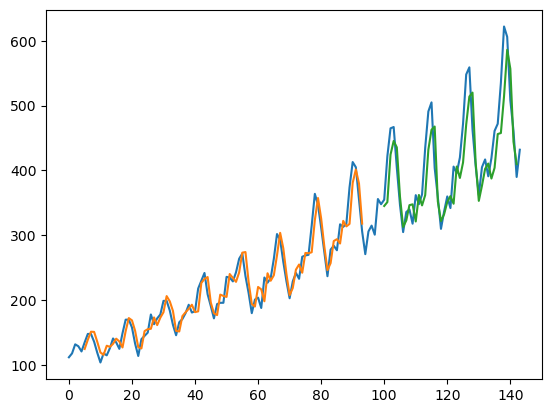

In [44]:
plt.plot(scaler.inverse_transform(dataframe))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()